# Data Preprocessing - Check Missing Values for Each Row and Each Column

In this notebook, we attempt to check the missing values for each data and each column.

## 0. Data & Package Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../database/2016-2022.csv')

In [3]:
df.head()

,year,ID,ticker,company_name,market_cap,bic_level_2,bic_level_3,unequal_voting,ceo_tenure,ipo_date,...,dividend_to_common,dividend_to_preferred,dividend_payout_ratio,total_compensation_to_executives,total_compensation_to_board_members,institution_ownership_percentage,asset_to_equity,cash_conversion_cycle,final_shares_outstanding,targeted
0,2016,1518855D US Equity,1518855D,Yahoo! Inc - Set up for Fundam,3.690000e+10,Media,Internet Media & Services,0.0,9.00000,NaN,...,0.000000e+00,0.0,-0.00000,8510000.0,1150000.000,NaN,1.57,NaN,954000000.0,0
1,2016,1539941D UN Equity,1539941D,Spectra Energy LLC,2.880000e+10,Oil & Gas,Oil & Gas Producers,0.0,4.25000,NaN,...,1.090000e+09,NaN,345.47300,23471757.0,3602528.659,41.5,3.00,14.6,702000000.0,0
2,2016,1556442D UA Equity,1556442D,GigPeak Inc,1.710000e+08,Tech Hardware & Semiconductors,Semiconductors,0.0,9.66667,NaN,...,0.000000e+00,0.0,0.00000,126000000.0,NaN,NaN,1.30,173.0,67700000.0,0
3,2016,1624831D UN Equity,1624831D,TIAA FSB Holdings Inc,2.460000e+09,Banking,Banking,0.0,20.00000,NaN,...,3.004690e+07,10125000.0,24.70332,8194543.0,1068000.000,89.0,15.10,NaN,127000000.0,0
4,2016,1627503D UN Equity,1627503D,Colony Capital Inc/Old,2.310000e+09,Financial Services,Specialty Finance,1.0,7.33333,NaN,...,1.810000e+08,48200000.0,176.07490,55521900.0,1970000.000,118.0,1.80,NaN,113000000.0,0


## 1. Check the missing values for each column (fields)

In [4]:
# Group by 'year' and calculate missing values for each year
grouped_missing = df.groupby('year').apply(lambda x: x.isnull().sum())
grouped_missing_pct = df.groupby('year').apply(lambda x: (x.isnull().mean() * 100))

# Rename columns for clarity
missing_data = {}
for year in range(2016, 2023):
    missing_data[f'{year}_count'] = grouped_missing.loc[year]
    missing_data[f'{year}_pct'] = grouped_missing_pct.loc[year]

# Calculate missing values for the entire dataframe
missing_data['total_count'] = df.isnull().sum()
missing_data['total_pct'] = df.isnull().mean() * 100

# Create the desired dataframe
df_missing = pd.DataFrame(missing_data)

In [5]:
df_missing.head()

,2016_count,2016_pct,2017_count,2017_pct,2018_count,2018_pct,2019_count,2019_pct,2020_count,2020_pct,2021_count,2021_pct,2022_count,2022_pct,total_count,total_pct
year,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.0,0,0.000000
ID,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.0,0,0.000000
ticker,0,0.000000,1,0.037951,0,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.0,1,0.005491
company_name,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.0,0,0.000000
market_cap,4,0.146735,4,0.151803,4,0.151573,5,0.195008,1,0.038314,0,0.0,0,0.0,18,0.098831


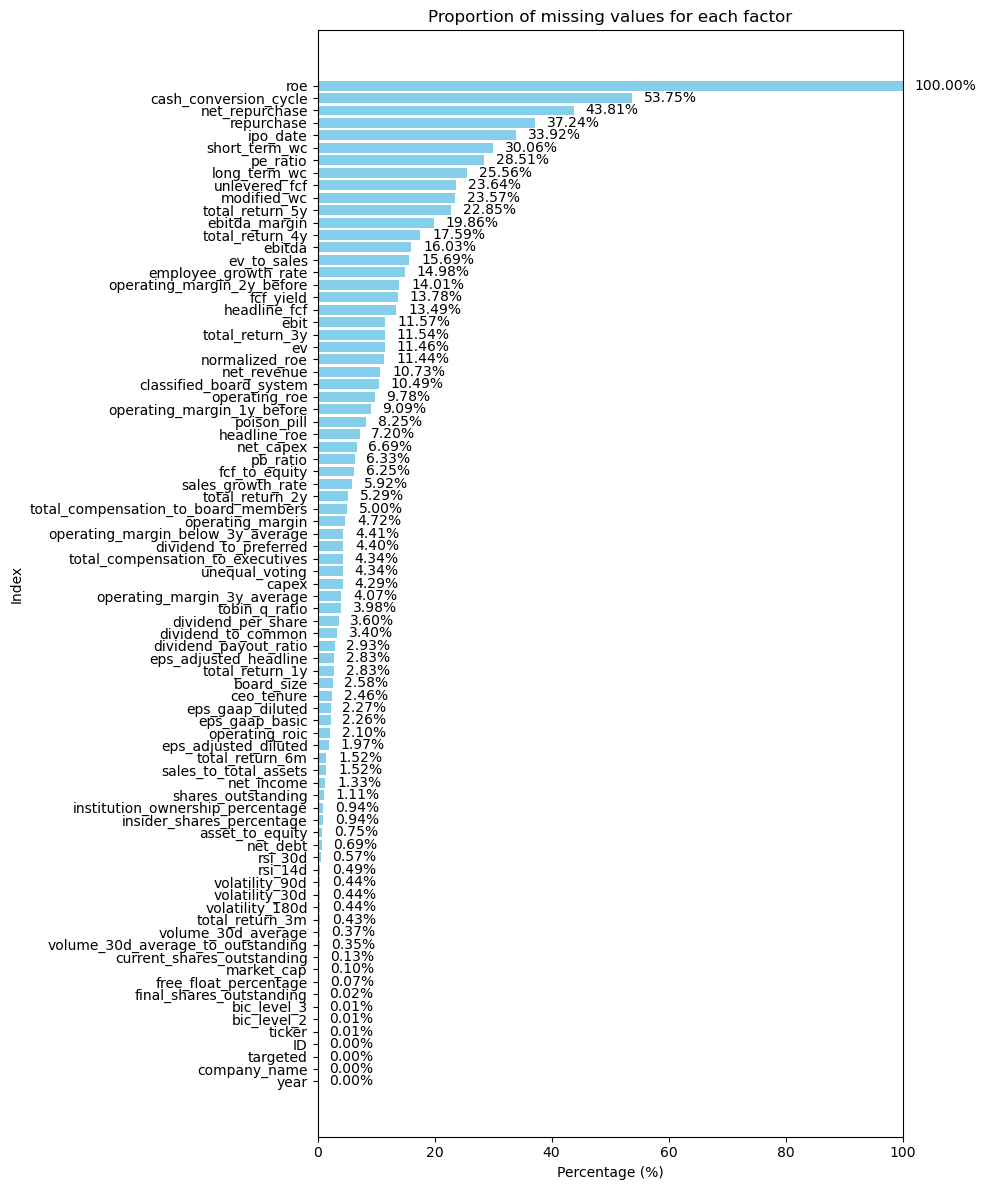

In [6]:
sorted_df = df_missing.sort_values(by='total_count', ascending=True)

# for index, row in sorted_df.iterrows():
#     print(f"{index:<35} {row['total_pct']:>7.2f}%")

plt.figure(figsize=(10, 12))
bars = plt.barh(sorted_df.index, sorted_df['total_pct'], color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('Index')
plt.title('Proportion of missing values for each factor')
plt.xlim(0, 100)  # Set the x-axis limit to 200

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_width() + 2,  # x position of text (2 units right of the bar end)
             bar.get_y() + bar.get_height()/2,  # y position of text (center of the bar)
             f'{bar.get_width():.2f}%',  # text
             va='center')  # vertical alignment

plt.tight_layout()
plt.show()

The fields with the most missing values (above 20%) are shown below:
- cash_conversion_cycle      53.75%
- net_repurchase             43.81%
- repurchase                 37.24%
- ipo_date                   33.92%
- short_term_wc              30.06%
- pe_ratio                   28.51%
- long_term_wc               25.56%
- unlevered_fcf              23.64%
- modified_wc                23.57%
- total_return_5y            22.85%

There are 10 fields that have more than 20% of the values missing.

## 2. Check the missing values for each row

Here, we group the rows by the number of total missing values.

Now, I want to do: 
1. Make a dataframe df that concatenates df16,df17...df22 vertically (note that df16,df17,...df22 have exactly the same columns)
2. Count the number of missing values for each row
3. And the group the rows by the number of missing values. 
4. Plot the bar chart such that you have number of missing values on the x axis in the ascending order starting from 0, and the number of the rows that have that many missing values on the y axis (Please write the number of the counts for each bar at the top of each bar)

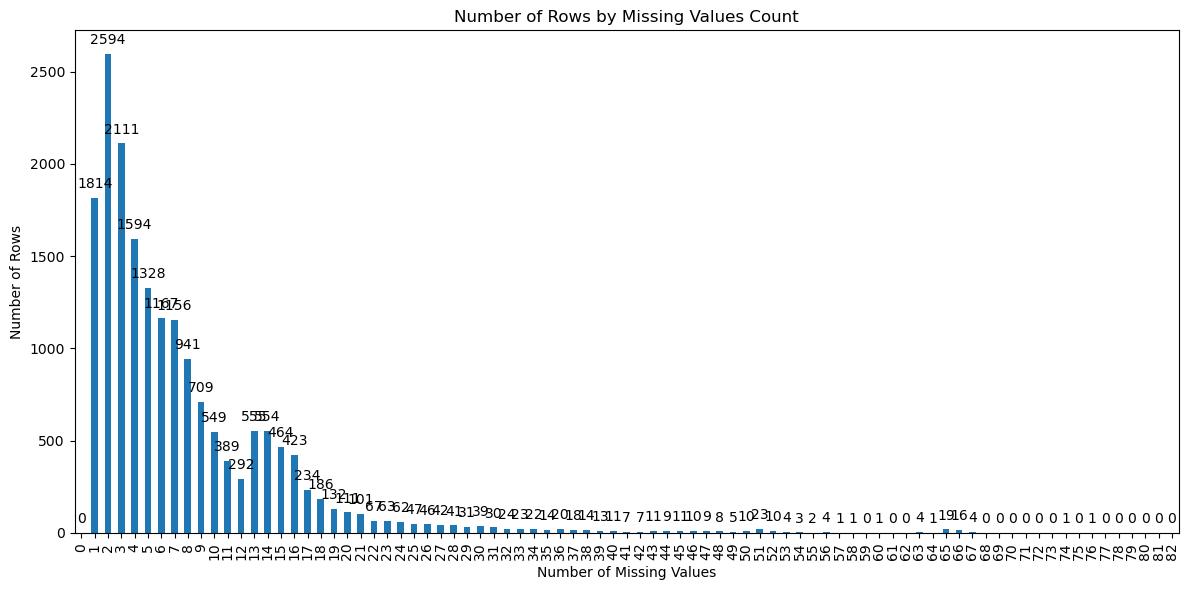

In [7]:
df['missing_count'] = df.isnull().sum(axis=1)
grouped = df['missing_count'].value_counts()

# Ensure all possible values are in the index
for i in range(df.shape[1] + 1):  # +1 because range is exclusive at the end
    if i not in grouped:
        grouped[i] = 0

grouped = grouped.sort_index()

# 4. Plot the bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Number of Rows by Missing Values Count')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


After done with data imputation, we might need to consider dropping some rows that has too many missing values. The specific threshold should be discussed later.

# 3. Conclusions

1. There are 10 fields with missing values of higher than 20%.
2. Most of the companies have missing values of fewer than 20 out of 81 fields. 